In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("language_detection.csv")

In [3]:
data

,Text,Language
0,"Nature, in the broadest sense, is the physica...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
23680,Fra 1. mai 2013 overføres ansvaret som kulturm...,Norwegian
23681,At et kulturminne er fredet innebærer at alle ...,Norwegian
23682,Avgjørelser i slike saker er delegert til fylk...,Norwegian
23683,"Eiere kan søke om dispensasjon fra fredningen,...",Norwegian


In [4]:
data["Language"].value_counts()

German        3000
English       2196
Portuguese    1672
French        1630
Italian       1605
Swedish       1451
Turkish       1370
Norwegian     1356
Spanish       1271
Catalan       1163
Arabic        1066
Russian       1032
Danish         997
Malayalam      936
Korean         922
Greek          799
Dutch          622
Tamil          545
Hindi           38
Japanese        14
Name: Language, dtype: int64

In [5]:
X = data["Text"]
Y = data["Language"]

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [7]:
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(23685, 94303)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [10]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9795229047920625


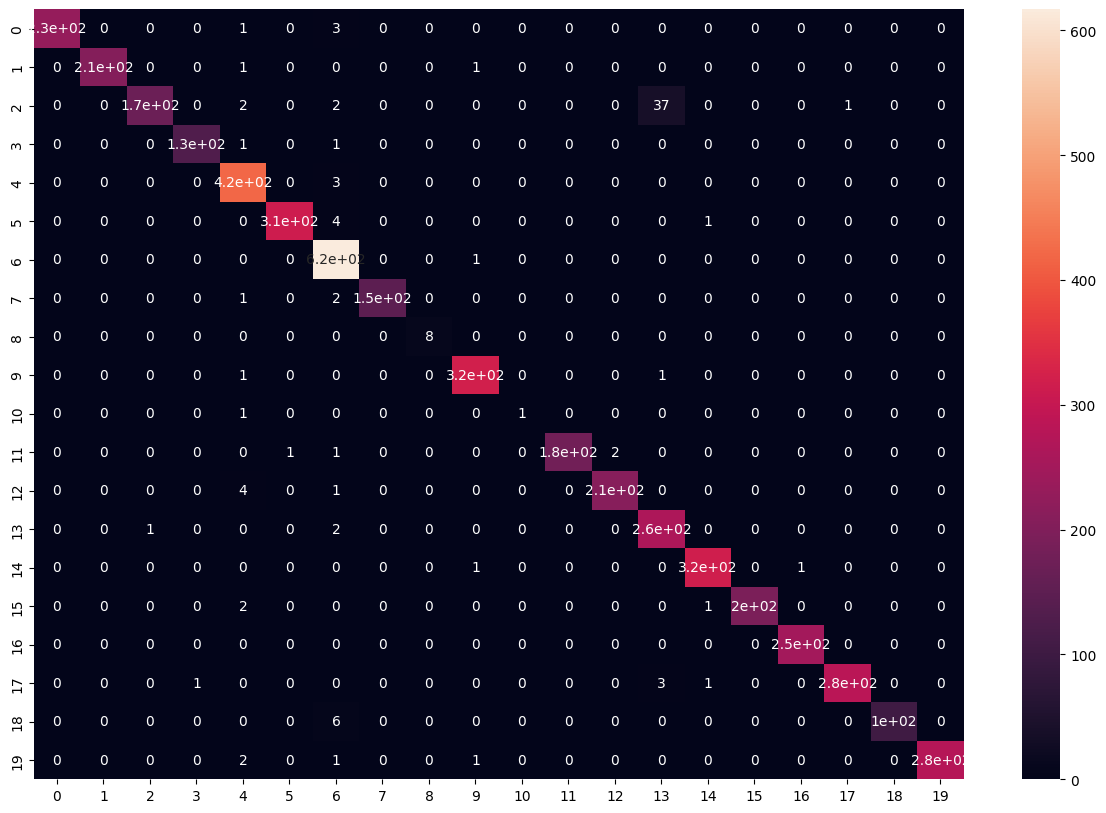

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [14]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The language is",lang[0]) # printing the language

In [20]:
predict("Καλησπέρα, τι κάνεις; Είσαι καλά;")

The language is German


In [16]:
import pickle

pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))